# Intro to TensorFlow and Music Generation with RNNs

**Part 1: Intro to TensorFlow**

**0.1 Install TensorFlow**


TensorFlow is a software library extensively used in machine learning.  
Here we'll learn how computations are represented and how to define a simple neural network in TensorFlow.

In [1]:
import tensorflow as tf

# Download and import the MIT Introduction to Deep Learning package
!pip install mitdeeplearning --quiet
import mitdeeplearning as mdl

import numpy as np
import matplotlib.pyplot as plt

# 1.1 Why is TensorFlow called TensorFlow?

TensorFlow is called 'TensorFlow' because it handles the flow (node/mathematical operation) of Tensors, which are data   structures that you can think of as multi-dimensional arrays. Tensors are represented as n-dimensional arrays of base dataypes   such as a string or integer -- they provide a way to generalize vectors and matrices to higher dimensions.  

The shape of a Tensor defines its number of dimensions and the size of each dimension. The rank of a Tensor provides the number   of dimensions (n-dimensions) -- you can also think of this as the Tensor's order or degree.  

Let's first look at 0-d Tensors, of which a scalar is an example:

In [2]:
sport = tf.constant("Tennis", tf.string)
number = tf.constant(1.41421356237, tf.float64)

print("`sport` is a {}-d Tensor".format(tf.rank(sport).numpy()))
print("`number` is a {}-d Tensor".format(tf.rank(number).numpy()))
print(sport.shape)
     

`sport` is a 0-d Tensor
`number` is a 0-d Tensor
()


Vectors and lists can be used to create 1-d Tensors:

In [3]:

sports = tf.constant(["Tennis", "Basketball"], tf.string)
numbers = tf.constant([3.141592, 1.414213, 2.71821], tf.float64)

print("`sports` is a {}-d Tensor with shape: {}".format(tf.rank(sports).numpy(), tf.shape(sports)))
print("`numbers` is a {}-d Tensor with shape: {}".format(tf.rank(numbers).numpy(), tf.shape(numbers)))
     

`sports` is a 1-d Tensor with shape: [2]
`numbers` is a 1-d Tensor with shape: [3]


Next we consider creating 2-d (i.e., matrices) and higher-rank Tensors. For examples, in future labs involving image processing   and computer vision, we will use 4-d Tensors. Here the dimensions correspond to the number of example images in our batch,   image height, image width, and the number of color channels.  

In [4]:
### Defining higher-order Tensors ###

'''TODO: Define a 2-d Tensor'''
matrix = tf.constant([[3.14159,1.1414],
                     [2.7154,3.25465]])
print("matrix is a {}-d Tensor with shape: {}".format(tf.rank(matrix).numpy(), tf.shape(matrix).numpy()))
assert isinstance(matrix, tf.Tensor), "matrix must be a tf Tensor object"
assert tf.rank(matrix).numpy() == 2
# print(matrix.shape)

matrix is a 2-d Tensor with shape: [2 2]


In [5]:
'''TODO: Define a 4-d Tensor.'''
# Use tf.zeros to initialize a 4-d Tensor of zeros with size 10 x 256 x 256 x 3.
#   You can think of this as 10 images where each image is RGB 256 x 256.
images = tf.zeros([10,256,256,3])
print("`images` is a {}-d Tensor with shape:{}".format(tf.rank(images).numpy(),tf.shape(images).numpy().tolist()))
assert isinstance(images, tf.Tensor), "matrix must be a tf Tensor object"
assert tf.rank(images).numpy() == 4, "matrix must be of rank 4"
assert tf.shape(images).numpy().tolist() == [10, 256, 256, 3], "matrix is incorrect shape"

`images` is a 4-d Tensor with shape:[10, 256, 256, 3]


As we have seen, the shape of a Tensor provides the number of elements in each Tensor dimension. The **shape** is quite useful,   and we'll use it often. You can also use slicing to access subtensors within a higher-rank Tensor:

In [6]:
row_vector = matrix[1]
column_vector = matrix[:,1]
scalar = matrix[0, 1]

print("`row_vector`: {}".format(row_vector.numpy()))
print("`column_vector`: {}".format(column_vector.numpy()))
print("`scalar`: {}".format(scalar.numpy()))

`row_vector`: [2.7154  3.25465]
`column_vector`: [1.1414  3.25465]
`scalar`: 1.1413999795913696


# 1.2 Computations on Tensors

A convenient way to think about and visualize computations in TensorFlow is in terms of graphs. We can define this graph in   terms of Tensors, which hold data, and the mathematical operations that act on these Tensors in some order. Let's look at a   simple example, and define this computation using TensorFlow:

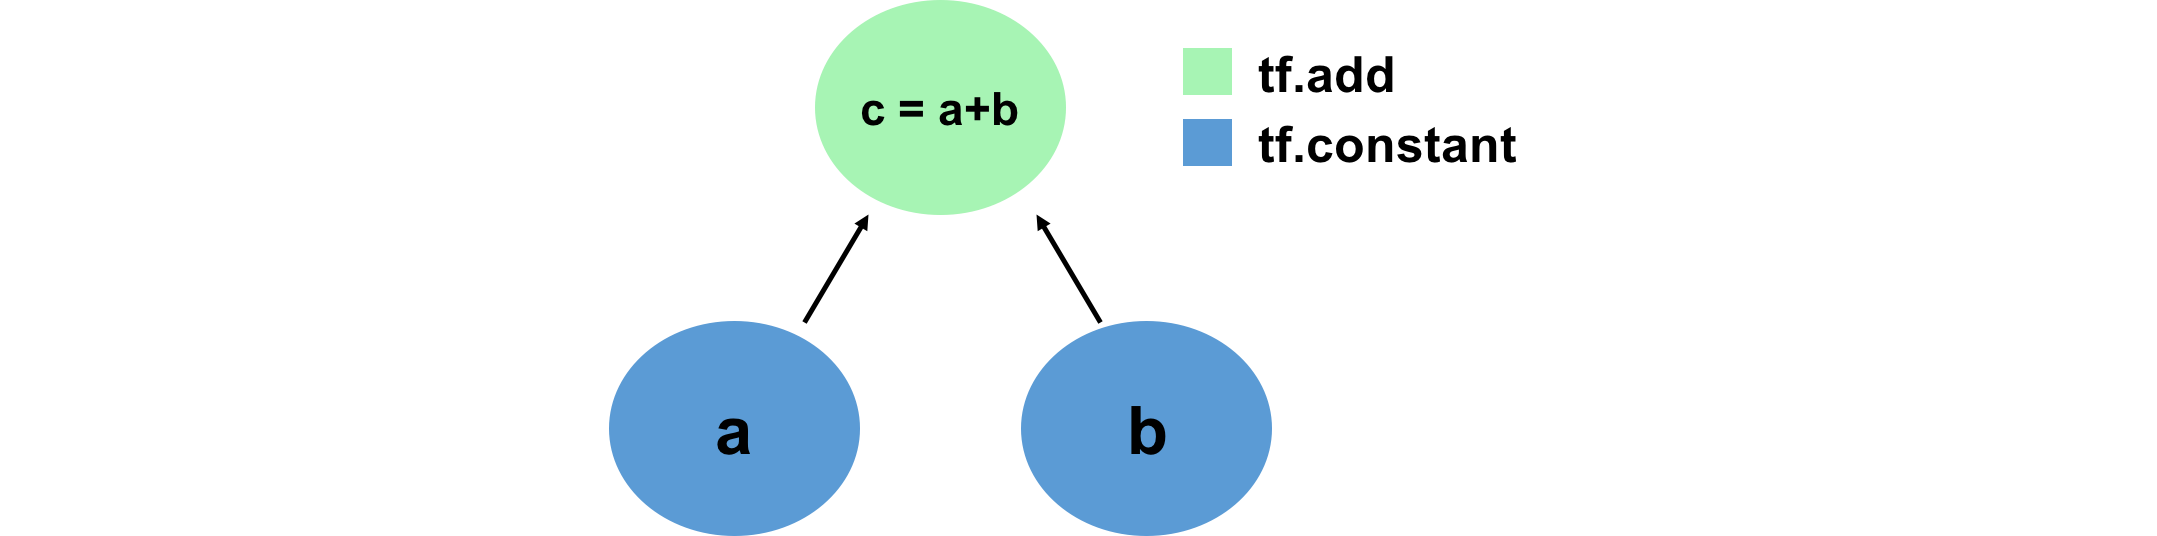

In [7]:
# Create the nodes in the graph, and initialize values
a = tf.constant(15)
b = tf.constant(61)

# Add them!
c1 = tf.add(a,b)
c2 = a + b # TensorFlow overrides the "+" operation so that it is able to act on Tensors
print(c1)
print(c2)
     

tf.Tensor(76, shape=(), dtype=int32)
tf.Tensor(76, shape=(), dtype=int32)


Notice how we've created a computation graph consisting of TensorFlow operations, and how the output is a Tensor with value 76 -  - we've just created a computation graph consisting of operations, and it's executed them and given us back the result.  

Now let's consider a slightly more complicated example:  

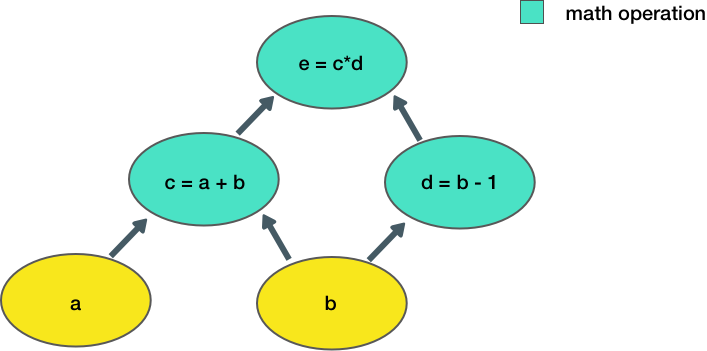

Here, we take two inputs, a, b, and compute an output e. Each node in the graph represents an operation that takes some input,   does some computation, and passes its output to another node.  
  
Let's define a simple function in TensorFlow to construct this computation function:

In [10]:
### Defining Tensor computations ###

# Construct a simple computation function
def func(a,b):
  '''TODO: Define the operation for c, d, e (use tf.add, tf.subtract, tf.multiply).'''
  c = tf.add(a,b)
  d = tf.subtract(b,1)
  e = tf.multiply(c,d)
  return e
     

In [11]:
# Consider example values for a,b
a, b = 1.5, 2.5
# Execute the computation
e_out = func(a,b)
print(e_out)

tf.Tensor(6.0, shape=(), dtype=float32)


Notice how our output is a Tensor with value defined by the output of the computation, and that the output has no shape as it is   a single scalar value.